# Laboratorio 3

**Brandon Sicay - 21757** 

**Daniel Morales - 21785**

Repositorio: https://github.com/DanielMorales1103/lab3-IA

# Task 1

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de
gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque

- La diferencia radica en la cantidad de datos que se utilizan en cada iteración. En el descenso de gradiente se utiliza todo el conjunto de datos en cada iteración, a diferencia del gradiente por mini batches utiliza un subconjunto más pequeño y el descenso de gradiente estocástico utiliza solamente un dato. 

Ventajas y Desventajas

- Descenso de gradiente
    - Ventaja: Tiene una convergencia más estable en conjunto de datos pequeños
    - Desventaja: Computacionalmente puede ser costoso para conjuntos de datos grandes.
- Descenso de gradiente por mini batches
    - Ventaja: Tiene un buen equilibrio entre su eficiencia y convergencia para conjuntos de datos medianamente grandes.
    - Desventaja: Requiere un ajuste del hiperparámetro para definir el tamaño del lote.
- Descenso de gradiente estocástico
    - Ventaja: Es bastante rápido para conjuntos de datos grandes, teniendo una necesidad de memoria baja.
    - Desventaja: Tiene actualizaciones ruidosas y menos estables debido a la variabilidad en los ejemplos individuales. 

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

Dimensión de los datos
    - Extracción: Se utiliza para reducir la dimensionalidad de los datos generando nuevos features.
    - Selección: Se utiliza para mantener un subconjunto de features originales. 
Naturaleza de los features
    - Extracción: Genera nuevos features, que pueden no tener una interpretación directa. 
    - Selección: Conserva los features originales, facilitando la interpretación de las mismas. 
Complejidad Computacional
    - Extracción: Puede ser computacionalmente costo para conjuntos de datos grandes.
    - Selección: Es menos costoso computacionalmente, ya que no se generan nuevos features. 
Interpretación del modelo
    - Extracción: Puede afectar su implementación debido a que se generan nuevos features.
    - Selección: Facilita la interpretación, ya que los features seleccionados son parte de los datos originales. 
- Escenarios:
Extracción de features:
Ejemplo: En reconocimiento de imágenes, se puede utilizar PCA para extraer características que representen las direcciones principales de variación en las imágenes, reduciendo así la complejidad y manteniendo la información importante.

Selección de features:
Ejemplo: En el análisis de texto, se pueden utilizar métodos de selección de características para identificar las palabras clave más relevantes que contribuyen significativamente a la predicción de una categoría o tema.

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros

- Arquitectura:
    - Nodos de entrada: Representan los features del conjunto de datos y cada uno de ellos tiene un valor asociado.

    - Pesos: Cada conexión entre un nodo de entrada y la neurona de salida tiene un peso. Estos pesos son los parámetros del modelo que se ajustan durante el proceso de aprendizaje.

    - Neurona de salida: Combina las entradas ponderadas con los pesos y aplica una función de activación para producir la salida del perceptrón.

- Funcionamiento: 
    - Entrada ponderada:
        - Para cada nodo de entrada, se multiplica su valor por el peso asociado.
        - Estos productos se suman para formar una combinación lineal de las entradas ponderadas.
    - Función de activación:
        - La combinación lineal obtenida se pasa a través de una función de activación.
        - La función de activación introduce no linealidades en el modelo y determina si la neurona de salida se activa o no.
    - Salida:
        - La salida de la neurona de salida es el resultado de la función de activación.

- Aprendizaje y actualización de parámetros
    - El perceptrón de una sola capa utiliza un enfoque de aprendizaje supervisado. Durante el entrenamiento, se presenta al perceptrón un       conjunto de datos etiquetado, y se ajustan los pesos para minimizar la diferencia entre la salida predicha y la salida deseada.
    - Cálculo de error
        - Se calcula la diferencia entre la salida predicha y la salida deseada (etiqueta real).
    - Actualización de pesos
        - Los pesos se actualizan utilizando una regla de actualización que minimiza el error.
        - La actualización de un peso w se realiza segun la fórmula: 
            w = w + α * (d - y) * x
          en donde α es la taza de aprendizaje, d es la salida deseada, y es la salida predicha, x es el valor de la entrada asociada al peso w.
    - Iteración
        - EL proceso se repite para múltiples ejemplos del conjunto de datos hasta que el modelo converge y los pesos convergan a valores en donde se minimiza el error. 
            

# Task 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [22]:
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def gradient(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

np.random.seed(42)


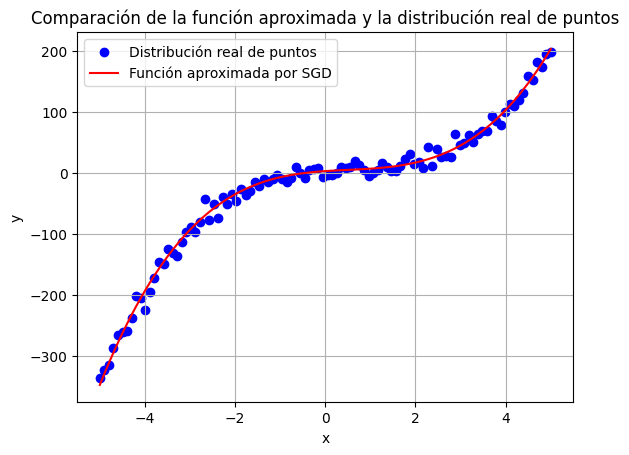

Tiempo de ejecución del Descenso de Gradiente Estocástico: 0.3700754642486572 segundos
MSE: 93.6332383282346


In [47]:
def stochastic_gradient_descent(x, learning_rate, epochs):
    start_time = time.time()
    # Inicializar pesos aleatorios
    weights = np.random.randn(4)  # 4 es el grado del polinomio
    for epoch in range(epochs):
        for i in range(len(x)):
            gradient_i = gradient(x[i])
            weights -= learning_rate * gradient_i
    end_time = time.time()
    execution_time = end_time - start_time
    return weights, execution_time

# Generar puntos de datos y aplicar ruido
x_real = np.linspace(-5, 5, 100)
y_real = polynomial(x_real)
y_noisy = y_real + np.random.normal(0, 10, len(x_real))

# Configuración de descenso de gradiente estocástico
learning_rate = 0.5
epochs = 100

x_initial = np.random.uniform(-5, 5, len(x_real))

# Aplicar descenso de gradiente estocástico
x_sgd, sgd_execution_time = stochastic_gradient_descent(x_initial.copy(), learning_rate, epochs)

# Graficar resultados
x_real = np.linspace(-5, 5, 100)
y_real = polynomial(x_real)
y_noisy = y_real + np.random.normal(0, 10, len(x_real))
# Graficar la distribución real de puntos
plt.scatter(x_real, y_noisy, color='blue', label='Distribución real de puntos')
# Generar valores de y aproximados utilizando los pesos finales
y_approximated = polynomial(x_real)  # Aquí, puedes utilizar tus pesos finales x_sgd si deseas una aproximación
# Graficar la función aproximada por el método de descenso de gradiente estocástico
plt.plot(x_real, y_approximated, color='red', label='Función aproximada por SGD')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de la función aproximada y la distribución real de puntos')
plt.legend()
plt.grid(True)
plt.show()

# Comparar tiempo de ejecución
print(f'Tiempo de ejecución del Descenso de Gradiente Estocástico: {sgd_execution_time} segundos')
# Calcular el error cuadrático medio
mse = mean_squared_error(y_noisy, y_approximated)

print("MSE:", mse)



In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time

def polynomial(x, coeffs):
    return coeffs[0] * x**3 + coeffs[1] * x**2 + coeffs[2] * x + coeffs[3]

def gradient(x, y, coeffs):
    y_pred = polynomial(x, coeffs)
    grad = [0] * len(coeffs)
    grad[0] = np.mean(2 * (y_pred - y) * x**3)
    grad[1] = np.mean(2 * (y_pred - y) * x**2)
    grad[2] = np.mean(2 * (y_pred - y) * x)
    grad[3] = np.mean(2 * (y_pred - y))
    return np.array(grad)

def gradient_descent(x, y, coeffs, learning_rate, epochs):
    for epoch in range(epochs):
        grad = gradient(x, y, coeffs)
        coeffs -= learning_rate * grad
        
        # Impresión de diagnóstico para monitorear el progreso
        if epoch % 1000 == 0:
            y_pred = polynomial(x, coeffs)
            mse = np.mean((y_pred - y)**2)
            if np.isnan(mse):
                break  # Salir temprano si encontramos nan

    return coeffs

# Generar puntos de datos y aplicar ruido
x_real = np.linspace(-5, 5, 100)
coeffs_real = np.array([2, -3, 5, 3])
y_real = polynomial(x_real, coeffs_real)
y_noisy = y_real + np.random.normal(0, 10, len(x_real))

# Configuración de descenso de gradiente
learning_rate = 1e-6  # Reducir el learning_rate
epochs = 10000

# Inicializar coeficientes aleatorios
coeffs_initial = np.random.uniform(-1, 1, 4)

# Aplicar descenso de gradiente
start_time = time.time()
optimized_coeffs = gradient_descent(x_real, y_noisy, coeffs_initial, learning_rate, epochs)
end_time = time.time()

# Calcular la función obtenida mediante descenso de gradiente
y_gradient = polynomial(x_real, optimized_coeffs)

# Calcular el error cuadrático medio (MSE)
execution_time = end_time - start_time
print(f"Tiempo de ejecución del Descenso de Gradiente: {execution_time} segundos")
mse = np.mean((y_noisy - y_gradient)**2)
print(f"MSE: {mse}")

Tiempo de ejecución del Descenso de Gradiente: 0.9208061695098877 segundos
MSE: 141.50057222641232


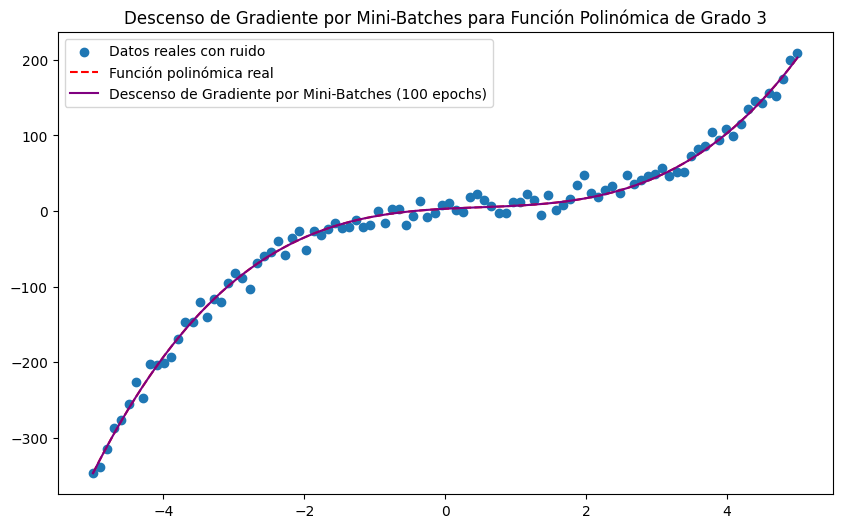

Tiempo de ejecución del Descenso de Gradiente por Mini-Batches: 0.047287702560424805 segundos
MSE: 96.77939384366445


In [45]:
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

def gradient(x):
    return np.polyval(np.polyder([2, -3, 5, 3]), x)

def mini_batch_gradient_descent(x, y, learning_rate, epochs, batch_size):
    start_time = time.time()
    for epoch in range(epochs):
        for i in range(0, len(x), batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            
            gradient_batch = gradient(x_batch)
            x_batch = x_batch - learning_rate * gradient_batch

    end_time = time.time()
    execution_time = end_time - start_time
    return x, execution_time

# Generar puntos de datos y aplicar ruido
x_real = np.linspace(-5, 5, 100)
y_real = polynomial(x_real)
y_noisy = y_real + np.random.normal(0, 10, len(x_real))


# Configuración de descenso de gradiente por mini-batches
learning_rate = 0.01
epochs = 100
batch_size = 10  

# Inicializar punto aleatorio para el descenso de gradiente
x_initial = np.random.uniform(-5, 5)

# Aplicar descenso de gradiente por mini-batches
x_mini_batch, mini_batch_execution_time = mini_batch_gradient_descent(x_real.copy(), y_noisy.copy(), learning_rate, epochs, batch_size)

y_pred = polynomial(x_mini_batch)
mse = np.mean((y_noisy - y_pred)**2)

plt.figure(figsize=(10, 6))
plt.scatter(x_real, y_noisy, label='Datos reales con ruido')
plt.plot(x_real, y_real, label='Función polinómica real', linestyle='--', color='red')
plt.plot(x_real, polynomial(x_mini_batch), label=f'Descenso de Gradiente por Mini-Batches ({epochs} epochs)', linestyle='-', color='purple')
plt.title('Descenso de Gradiente por Mini-Batches para Función Polinómica de Grado 3')
plt.legend()
plt.show()

# Comparar tiempo de ejecución
print(f'Tiempo de ejecución del Descenso de Gradiente por Mini-Batches: {mini_batch_execution_time} segundos')
print(f'MSE: {mse}')



- Tiempos de ejecución:
    - Descenso de Gradiente Estocástico: 0.17220234870910645 segundos
    - Descenso de Gradiente: 0.0030002593994140625 segundos
    - Descenso de Gradiente por Mini-Batches: 0.038971900939941406 segundos

    El más rápido fue el de Descenso de Gradiente, pudo ser más rápido porque usa todos los datos en cada iteración, esto puede llegar a tener un costo computacional mayor pero también puede llegar a converger más rápido debido a que utiliza todos los datos. 
- Fitness:
    - Descenso de Gradiente Estocástico: MSE: 93.6332383282346
    - Descenso de Gradiente: MSE: 141.50057222641232
    - Descenso de Gradiente por Mini-Batches: MSE: 96.77939384366445

    El que tiene un menor MSE es el de Gradiente Estocástico, puede deberse a que el descenso de gradiente estocástico actualiza los parámetros para cada muestra individualmente, también puede navegar más eficientemente a través de los mínimos locales del espacio de búsqueda, lo que a veces permite encontrar mejores mínimos generales que los otros métodos

## Task 2.2 - Feature Selection

### Análisis de lab 3

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

path = "high_diamond_ranked_10min.csv"
data = pd.read_csv(path)
data.head()


df = data.drop(['gameId', 'blueWins'], axis=1)

feature_labels = data.drop(['gameId', 'blueWins'], axis=1)
blueWins = data['blueWins']

# Escalamiento de Features
feature_labels = pd.DataFrame(StandardScaler().fit_transform(feature_labels), columns=feature_labels.columns)

X_train, X_temp, y_train, y_temp = train_test_split(feature_labels, blueWins, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)



### **SVM**

In [5]:
from sklearn import svm
from sklearn.metrics import precision_score
import numpy as np

model = svm.SVC(kernel='rbf', class_weight={-1:1, 1:10})
y_training = np.where(y_train.values <= 0, -1, 1)
model.fit(X_train.values, y_training)

y_pred = model.predict(X_test.values)
y_true = np.where(y_test.values <= 0, -1, 1)
L_precision = precision_score(y_true, y_pred, average='weighted')

print("Precisión del modelo sin feature: " + str(L_precision))

Precisión del modelo sin feature selection: 0.7281314823902109


### **Técnica 1: Feature Importance**

Precisión del modelo con Feature Importance: 0.7258098954867387


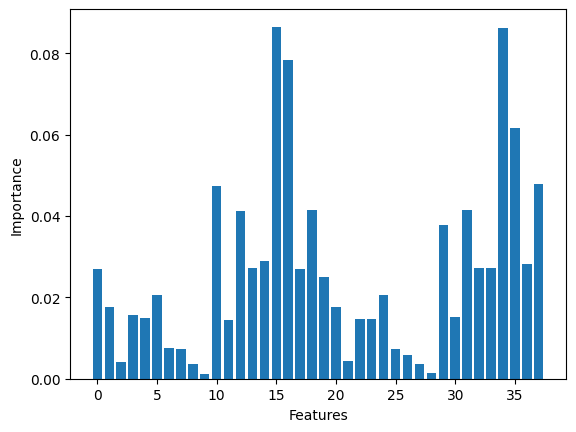

In [9]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state = 1)
model.fit(feature_labels,blueWins)
# obtener las importancias 
importances = model.feature_importances_
plt.bar(range(feature_labels.shape[1]), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show

# Seleccionar solamente 2 variables para x
feature_labels_1 = feature_labels[['blueGoldDiff', 'blueExperienceDiff']]

# Split the dataset a  training, validation, y test sets
X_train, X_temp, y_train, y_temp = train_test_split(feature_labels_1, blueWins, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

model = svm.SVC(kernel='rbf', class_weight={-1:1, 1:10})
y_training = np.where(y_train.values <= 0, -1, 1)
model.fit(X_train.values, y_training)

y_pred = model.predict(X_test.values)
y_true = np.where(y_test.values <= 0, -1, 1)
L_precision = precision_score(y_true, y_pred, average='weighted')

print("Precisión del modelo con Feature Importance: " + str(L_precision))

### **Técnica 2: Recursive Feature Elimination (RFE)**

In [10]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Entrenamos RFE con un SVM como estimador
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(feature_labels, blueWins)

# Transformamos el dataset con las características seleccionadas por RFE
X_rfe = selector.transform(feature_labels)

# Dividimos el conjunto de datos transformado
X_train, X_temp, y_train, y_temp = train_test_split(X_rfe, blueWins, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Entrenamos y evaluamos el modelo SVM con las características seleccionadas
model = svm.SVC(kernel='rbf', class_weight={-1:1, 1:10})
y_training = np.where(y_train.values <= 0, -1, 1)
model.fit(X_train, y_training)

y_pred = model.predict(X_test)
y_true = np.where(y_test.values <= 0, -1, 1)
L_precision = precision_score(y_true, y_pred, average='weighted')

print("Precisión del modelo con RFE: " + str(L_precision))


Precisión del modelo con RFE: 0.7268152006670276


### **Técnica 3: ANOVA F-value**

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# Aplicamos la selección univariable con la prueba ANOVA F-value
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(feature_labels, blueWins)

# Dividimos el conjunto de datos transformado
X_train, X_temp, y_train, y_temp = train_test_split(X_new, blueWins, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Entrenamos y evaluamos el modelo SVM con las características seleccionadas
model = svm.SVC(kernel='rbf', class_weight={-1:1, 1:10})
y_training = np.where(y_train.values <= 0, -1, 1)
model.fit(X_train, y_training)

y_pred = model.predict(X_test)
y_true = np.where(y_test.values <= 0, -1, 1)
L_precision = precision_score(y_true, y_pred, average='weighted')

print("Precisión del modelo con Selección Univariable (ANOVA F-value): " + str(L_precision))


Precisión del modelo con Selección Univariable (ANOVA F-value): 0.7268152006670276


#### **Métrica:** Precisión

Se decidió tomar la métrica Presicion, ya que se centra en el costo de los falsos positivos, ya que predecir una victoria cuando en realidad es una derrota, suele tener un mayor costo. Por lo que la precisión se centraría en minimizar esos costosos falsos positivos. Por otro lado, se tiene un enfoque en la Clase Positiva. El objetivo del modelo es identificar con alta confiabilidad cuando el equipo azul va a ganar, por lo que se busca una alta precisión para la clase de victorias.


#### **Rendimiento:** 


|No Feature| Feature Importance |RFE|ANOVA F-value|
|--|--|--|--|
|0.7281314823902109  |0.7258098954867387|0.7268152006670276|0.7268152006670276|

La diferencia en la precisión entre los métodos no es significativa, lo que indica que la selección de características no tuvo un impacto grande en este caso específico. El hecho de que el modelo sin selección de características haya obtenido la mejor precisión podría deberse a que la mayoría de las características originales proporcionan información útil para el modelo, y su eliminación, incluso de las menos importantes, resulta en una ligera pérdida de información útil para la predicción.

## Task 2.3 - Perceptrón

Perceptron classification accuracy 0.6


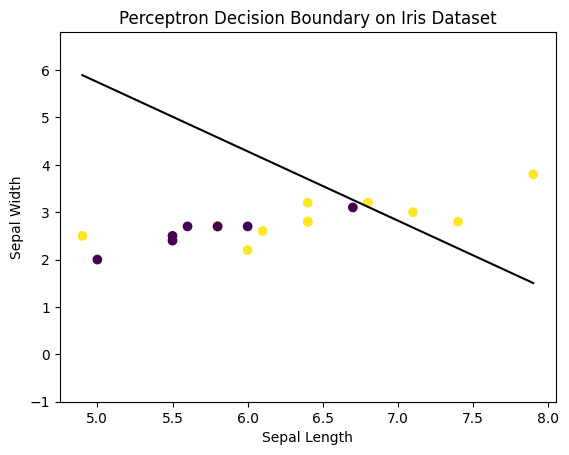

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

def unit_step_func(x):
    return np.where(x > 0, 1, 0)

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0, 1, 0)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

iris = datasets.load_iris()
X = iris.data[:, :2]  # sepal length and sepal width
y = iris.target

# Eliminamos Iris setosa
X = X[y != 0, :2]
y = y[y != 0]
y = np.where(y == 1, 0, 1)  #  binary classification 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the perceptron
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

#  accuracy
print("Perceptron classification accuracy", accuracy(y_test, predictions))

# Plot the decision boundary
# (x0 represents sepal length and x1 represents sepal width)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test)

x0_1 = np.amin(X_test[:, 0])
x0_2 = np.amax(X_test[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X_test[:, 1])
ymax = np.amax(X_test[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Perceptron para Iris Dataset')

plt.show()


In [8]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.33      0.50        12

    accuracy                           0.60        20
   macro avg       0.75      0.67      0.58        20
weighted avg       0.80      0.60      0.57        20



El modelo predijo correctamente el 60% de las instancias de prueba por parte de accurancy.  PPara la clase 0, el F1-score es del 67%, y para la clase 1, es del 50%. Debido a que solo se utilizan dos características y el problema se ha simplificado a una clasificación binaria, accurancy nos proporciona una idea de cómo el modelo se desempeña en la separación de estas dos clases específicas. Además, los datos de Iris son balanceados al eliminar las instancias de una clase (la primera)